<a href="https://colab.research.google.com/github/saii4u/Coventry_University/blob/main/Project_code_15388645.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv("/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2019-2021.csv")

In [ ]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,AK,Denali,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,348.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Male,Race/Ethnicity,White,T2,2068,63.678820,-149.960801,POINT (-149.9608012 63.67881971)
1,2020,CA,California,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,230.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Male,Race/Ethnicity,More than one race,T2,6,37.241400,-119.601000,POINT (-119.601 37.2414)
2,2020,CO,Park County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,135.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,White,T2,8093,39.115616,-105.708698,POINT (-105.7086982 39.11561621)
3,2020,FL,Walton County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,126.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,Asian,T2,12131,30.655966,-86.157457,POINT (-86.15745736 30.65596581)
4,2020,GA,Whitfield County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,155.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,Hispanic,T2,13313,34.803854,-84.962112,POINT (-84.96211184 34.80385386)


In [ ]:
df.shape

(78792, 21)

In [ ]:
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'TopicID', 'LocationID', 'Y_lat', 'X_lon',
       'Georeference'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78792 entries, 0 to 78791
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        78792 non-null  int64  
 1   LocationAbbr                78792 non-null  object 
 2   LocationDesc                78792 non-null  object 
 3   GeographicLevel             78792 non-null  object 
 4   DataSource                  78792 non-null  object 
 5   Class                       78792 non-null  object 
 6   Topic                       78792 non-null  object 
 7   Data_Value                  34430 non-null  float64
 8   Data_Value_Unit             78792 non-null  object 
 9   Data_Value_Type             78792 non-null  object 
 10  Data_Value_Footnote_Symbol  44362 non-null  object 
 11  Data_Value_Footnote         44362 non-null  object 
 12  StratificationCategory1     78792 non-null  object 
 13  Stratification1             787

In [ ]:
df.isnull().sum()

,0
Year,0
LocationAbbr,0
LocationDesc,0
GeographicLevel,0
DataSource,0
Class,0
Topic,0
Data_Value,44362
Data_Value_Unit,0
Data_Value_Type,0


In [ ]:

df['Data_Value'] = df['Data_Value'].fillna(df['Data_Value'].median())
df['Y_lat'] = df['Y_lat'].fillna(df['Y_lat'].mean())
df['X_lon'] = df['X_lon'].fillna(df['X_lon'].mean())


string_cols = ['Data_Value_Footnote_Symbol', 'Data_Value_Footnote','Georeference']
for col in string_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df.isnull().sum()

,0
Year,0
LocationAbbr,0
LocationDesc,0
GeographicLevel,0
DataSource,0
Class,0
Topic,0
Data_Value,0
Data_Value_Unit,0
Data_Value_Type,0


In [ ]:
df.shape

(78792, 21)

In [ ]:
df.describe()

,Year,Data_Value,LocationID,Y_lat,X_lon
count,78792.0,78792.000000,78792.000000,78792.000000,78792.000000
mean,2020.0,342.485237,30922.418824,37.901745,-91.406452
std,0.0,105.947764,16737.598878,6.325418,15.939840
min,2020.0,0.000000,0.000000,-14.301754,-170.719474
25%,2020.0,335.400000,18133.000000,34.326243,-98.129615
50%,2020.0,335.400000,29205.000000,38.219932,-89.932976
75%,2020.0,335.400000,46089.000000,41.695739,-82.890640
max,2020.0,3203.900000,78030.000000,69.309529,145.751259


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df["Data_Value"].unique()

array([348.8, 230.1, 135.9, ...,  47.3,  50.1, 579. ])

In [ ]:
df["Data_Value"].nunique()

6837

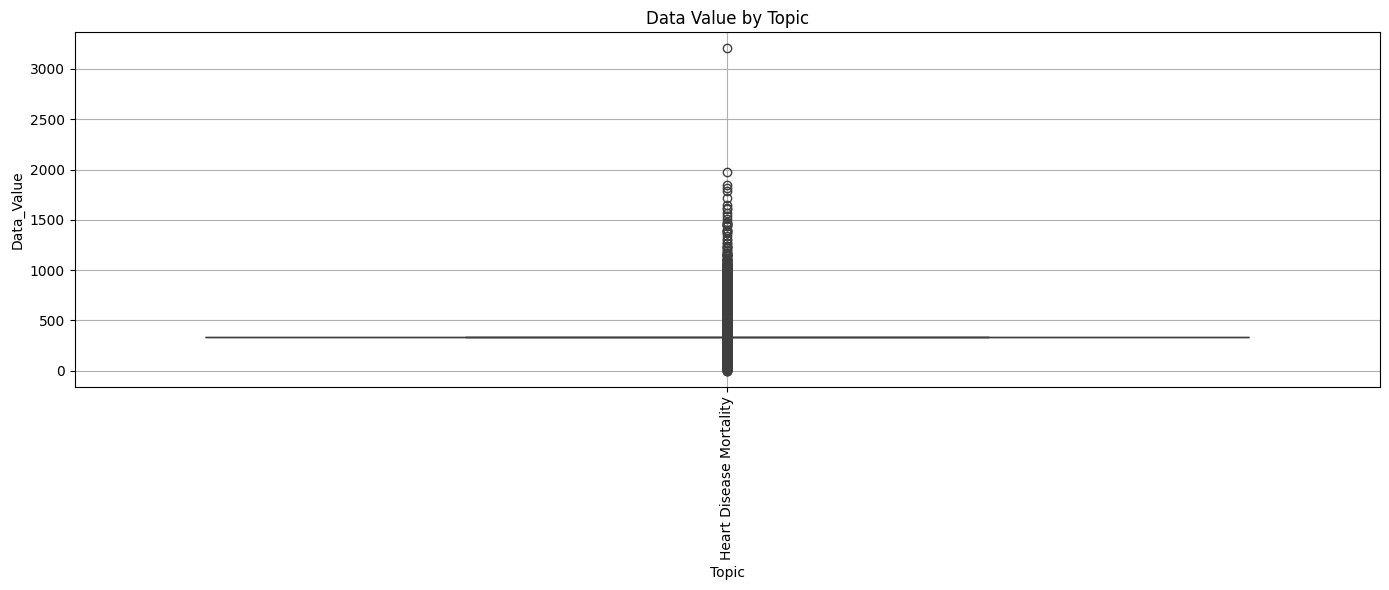

In [ ]:
mp.figure(figsize=(14, 6))
sb.boxplot(x='Topic', y='Data_Value', data=df)
mp.xticks(rotation=90)
mp.title('Data Value by Topic')
mp.grid(True)
mp.tight_layout()
mp.show()


In [ ]:
df.shape

(78792, 21)

In [ ]:

Q1 = df['Data_Value'].quantile(0.25)
Q3 = df['Data_Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df['Data_Value'] >= lower_bound) & (df['Data_Value'] <= upper_bound)]


In [ ]:
df['Data_Value'].value_counts()

,count
Data_Value,
335.4,44370
293.7,20
439.2,18
374.2,18
255.4,18
...,...
53.3,1
145.3,1
568.3,1


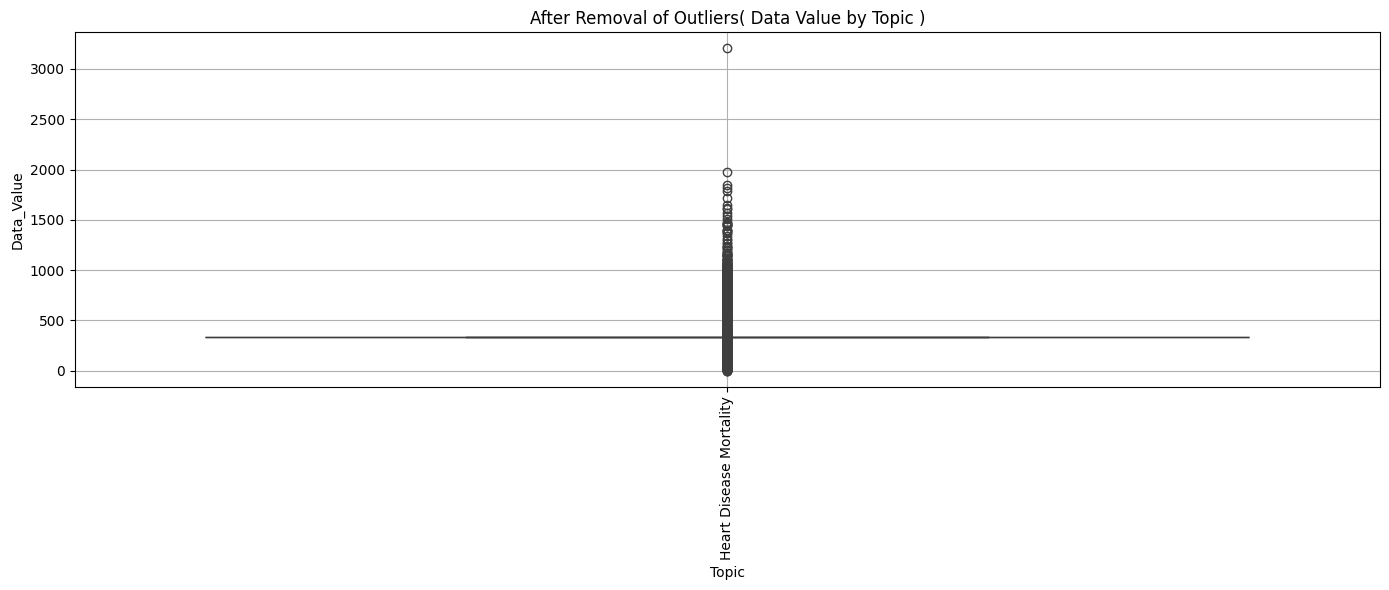

In [ ]:
mp.figure(figsize=(14, 6))
sb.boxplot(x='Topic', y='Data_Value', data=df)
mp.xticks(rotation=90)
mp.title('After Removal of Outliers( Data Value by Topic )')
mp.grid(True)
mp.tight_layout()
mp.show()


In [ ]:
df_filtered.shape

(44370, 21)

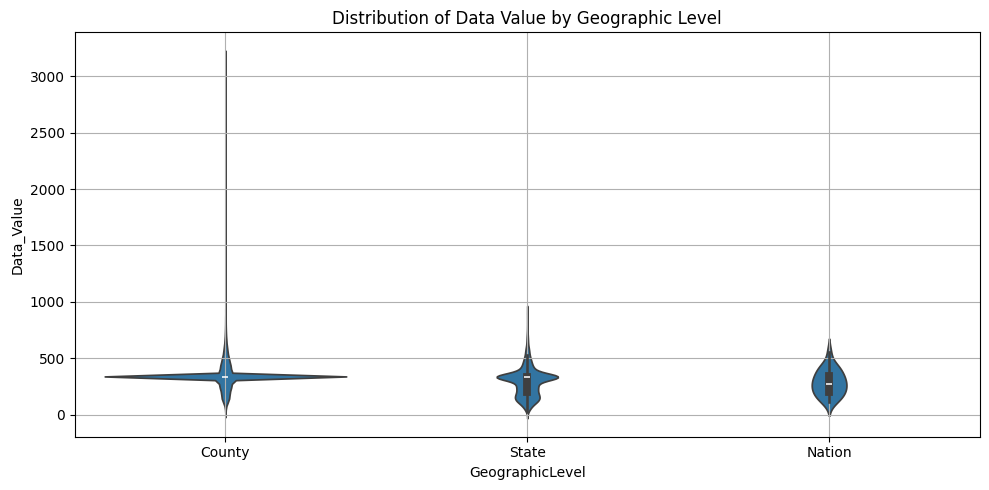

In [ ]:
mp.figure(figsize=(10, 5))
sb.violinplot(x='GeographicLevel', y='Data_Value', data=df)
mp.title('Distribution of Data Value by Geographic Level')
mp.grid(True)
mp.tight_layout()
mp.show()


In [ ]:
df.Data_Value.unique()

array([348.8, 230.1, 135.9, ...,  47.3,  50.1, 579. ])

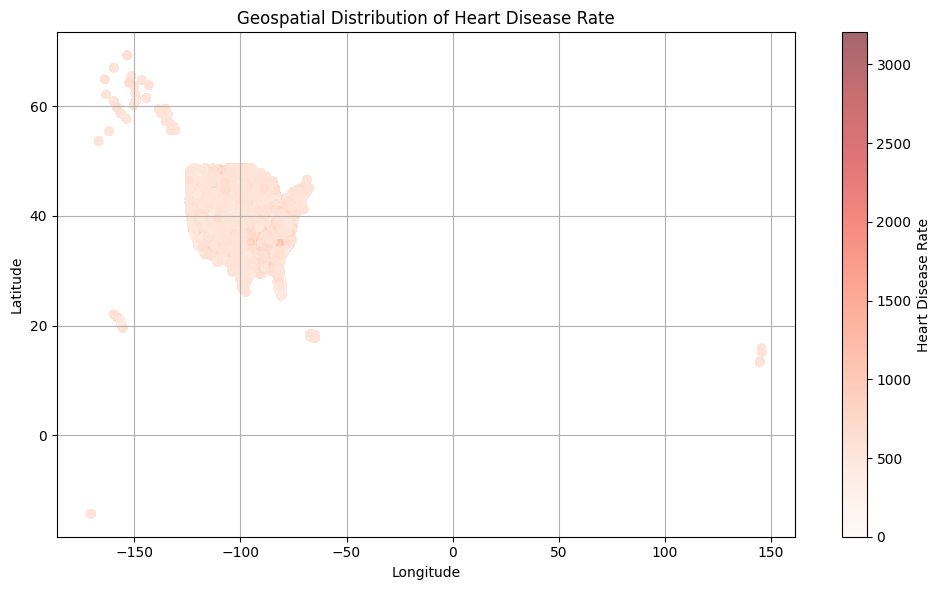

In [ ]:
mp.figure(figsize=(10, 6))
mp.scatter(df['X_lon'], df['Y_lat'], c=df['Data_Value'], cmap='Reds', s=30, alpha=0.6)
mp.colorbar(label='Heart Disease Rate')
mp.title('Geospatial Distribution of Heart Disease Rate')
mp.xlabel('Longitude')
mp.ylabel('Latitude')
mp.grid(True)
mp.tight_layout()
mp.show()


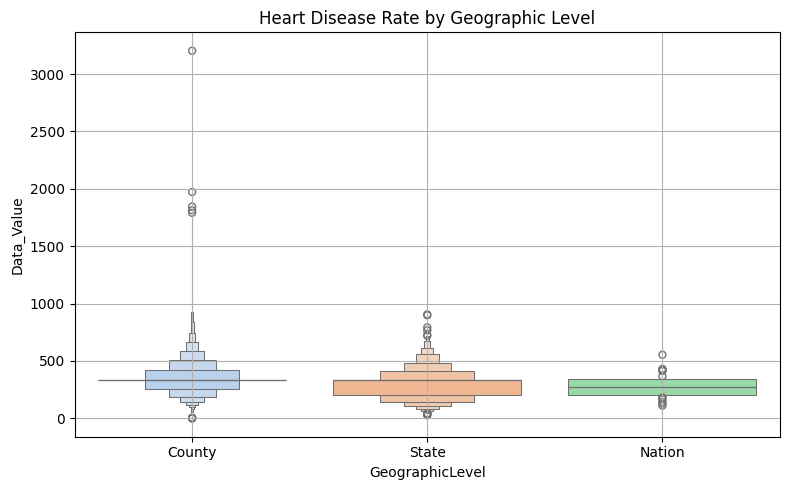

In [ ]:
mp.figure(figsize=(8, 5))
sb.boxenplot(x='GeographicLevel', y='Data_Value', data=df, palette='pastel')
mp.title('Heart Disease Rate by Geographic Level')
mp.grid(True)
mp.tight_layout()
mp.show()


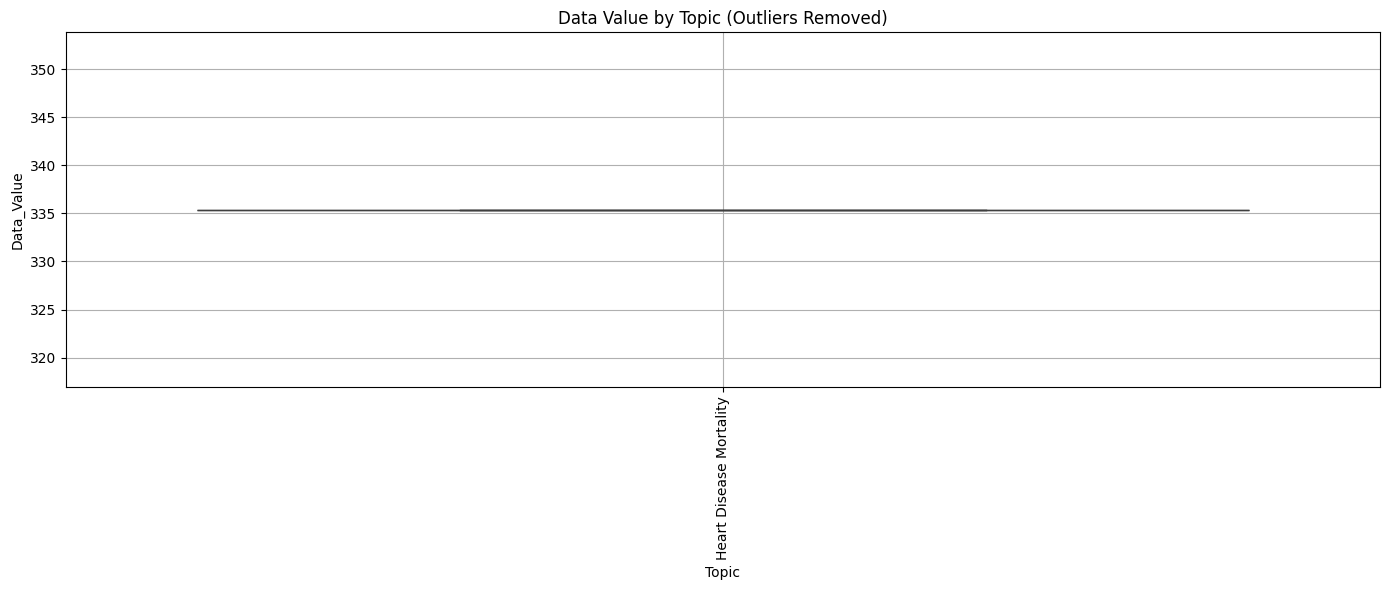

In [ ]:
mp.figure(figsize=(14, 6))
sb.boxplot(x='Topic', y='Data_Value', data=df_filtered)
mp.xticks(rotation=90)
mp.title('Data Value by Topic (Outliers Removed)')
mp.grid(True)
mp.tight_layout()
mp.show()

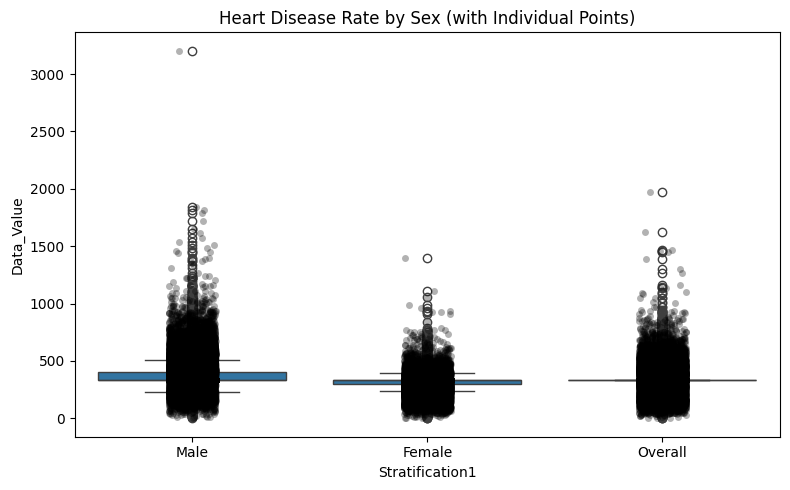

In [ ]:
mp.figure(figsize=(8, 5))
df_sex = df[df['StratificationCategory1'] == 'Sex']
sb.boxplot(x='Stratification1', y='Data_Value', data=df_sex, whis=1.5)
sb.stripplot(x='Stratification1', y='Data_Value', data=df_sex, color='black', alpha=0.3)
mp.title('Heart Disease Rate by Sex (with Individual Points)')
mp.tight_layout()
mp.show()


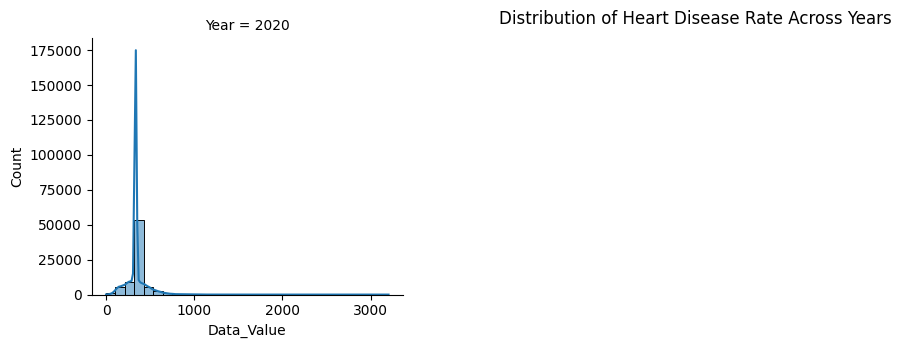

In [ ]:
g = sb.FacetGrid(df, col='Year', col_wrap=4, height=3.5)
g.map(sb.histplot, 'Data_Value', bins=30, kde=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Heart Disease Rate Across Years')
mp.show()


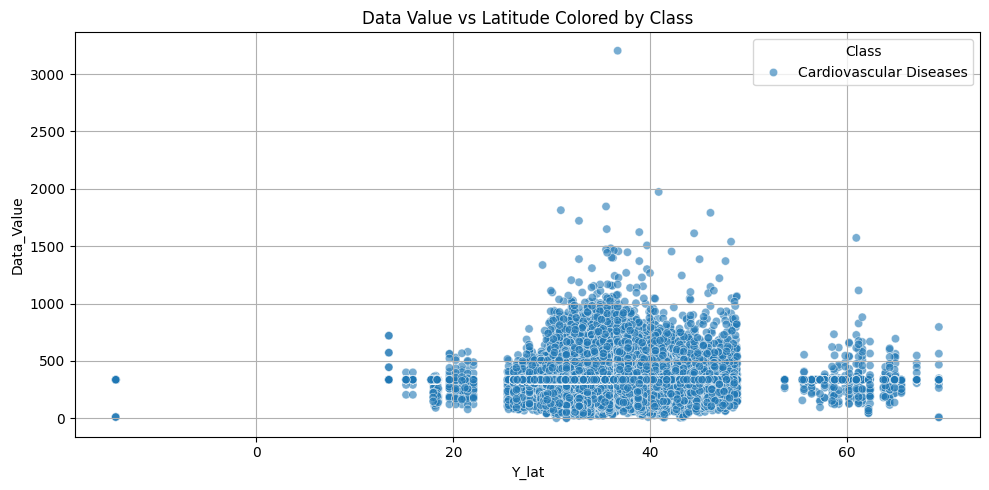

In [ ]:
mp.figure(figsize=(10, 5))
sb.scatterplot(x='Y_lat', y='Data_Value', hue='Class', data=df, alpha=0.6)
mp.title('Data Value vs Latitude Colored by Class')
mp.grid(True)
mp.tight_layout()
mp.show()

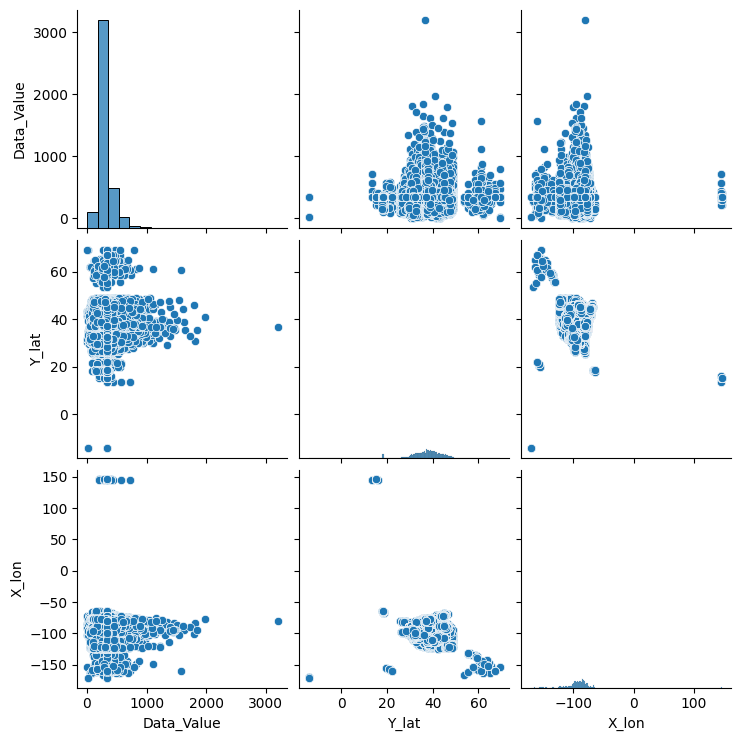

In [ ]:
sb.pairplot(df[['Data_Value', 'Y_lat', 'X_lon']])
mp.show()

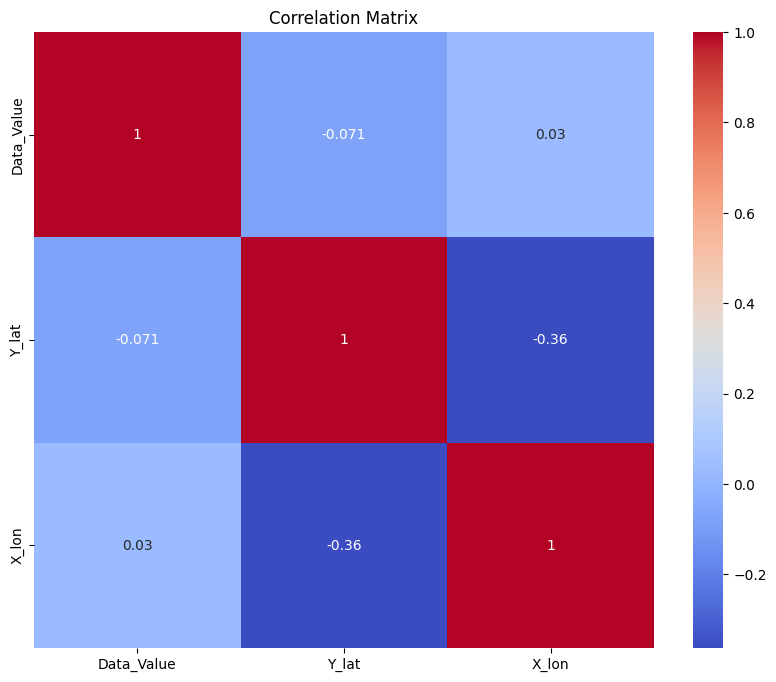

In [ ]:
mp.figure(figsize=(10, 8))
sb.heatmap(df[['Data_Value', 'Y_lat', 'X_lon']].corr(), annot=True, cmap='coolwarm')
mp.title('Correlation Matrix')
mp.show()

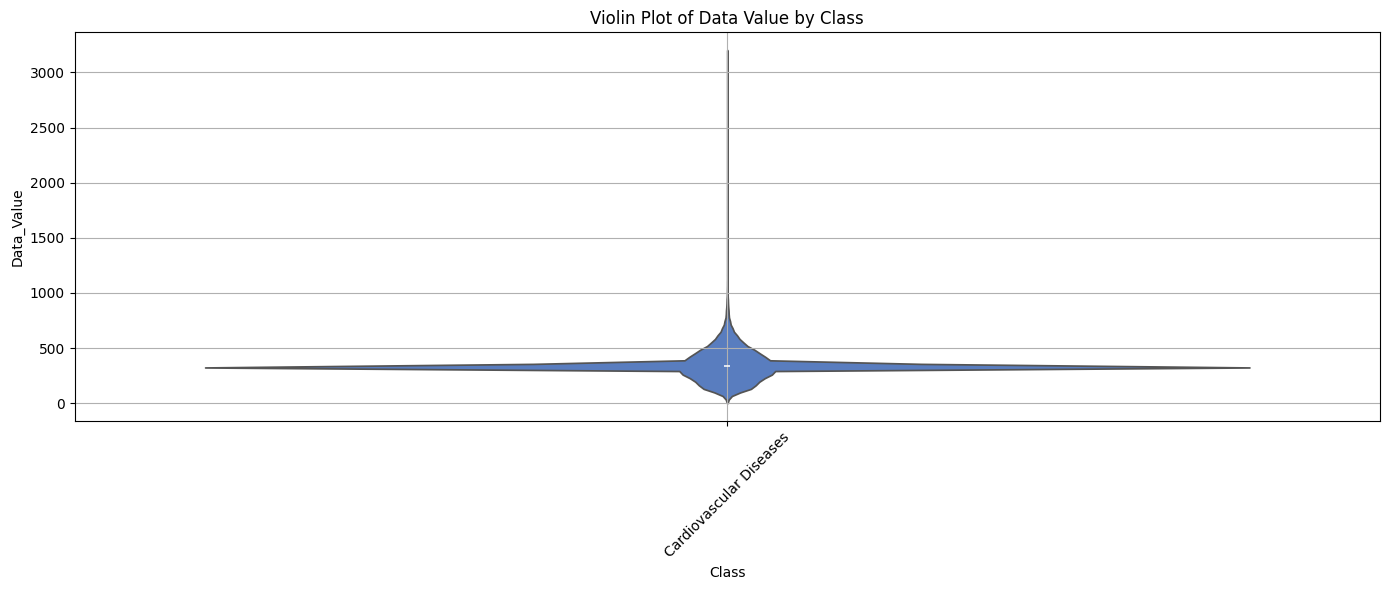

In [ ]:
mp.figure(figsize=(14, 6))
sb.violinplot(x='Class', y='Data_Value', data=df, palette='muted', cut=0)
mp.title('Violin Plot of Data Value by Class')
mp.xticks(rotation=45)
mp.grid(True)
mp.tight_layout()
mp.show()


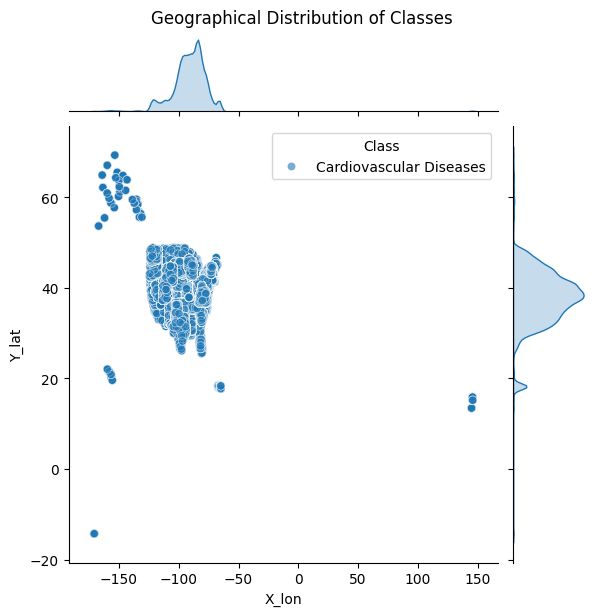

In [ ]:
sb.jointplot(data=df, x='X_lon', y='Y_lat', hue='Class', kind='scatter', alpha=0.6)
mp.suptitle('Geographical Distribution of Classes', y=1.02)
mp.show()


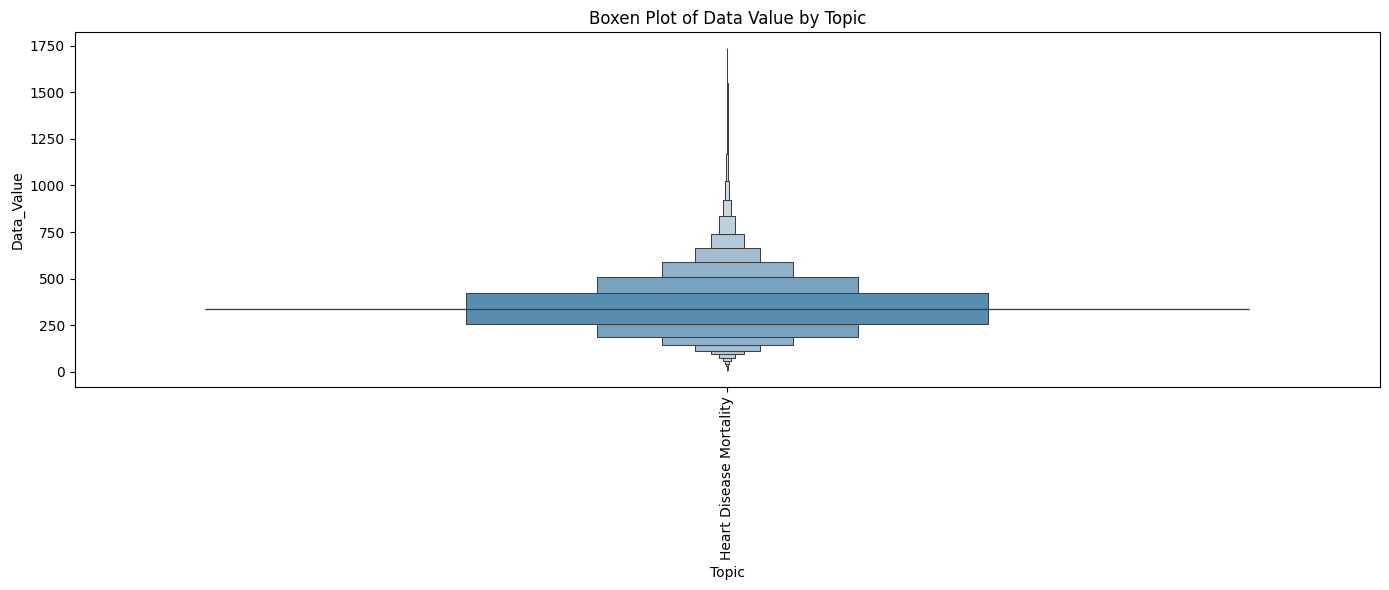

In [ ]:
mp.figure(figsize=(14, 6))
sb.boxenplot(x='Topic', y='Data_Value', data=df, showfliers=False)
mp.title('Boxen Plot of Data Value by Topic')
mp.xticks(rotation=90)
mp.tight_layout()
mp.show()


In [ ]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

features = df.drop(columns=['Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Georeference'])


In [ ]:
X = features.drop(columns=['Data_Value'])  # All features
y = df['Data_Value']                      # Target variable


In [ ]:
print(pd.Series(y).value_counts())

Data_Value
335.4    44370
293.7       20
439.2       18
374.2       18
255.4       18
         ...  
53.3         1
145.3        1
568.3        1
790.8        1
783.7        1
Name: count, Length: 6837, dtype: int64


In [ ]:

df = pd.concat([X, y], axis=1)
df.columns = list(X.columns) + ['target']

value_counts = df['target'].value_counts()


rare_threshold = 500
rare_values = value_counts[value_counts < rare_threshold].index

majority_df = df[~df['target'].isin(rare_values)]
rare_df = df[df['target'].isin(rare_values)]


oversample_count = len(majority_df)
rare_df_oversampled = rare_df.sample(oversample_count, replace=True, random_state=42)

balanced_df = pd.concat([majority_df, rare_df_oversampled], axis=0).sample(frac=1, random_state=42)

X = balanced_df.drop(columns='target')
y = balanced_df['target']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Random Forest Model

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)


rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\n Random Forest Baseline Evaluation:")
print(f" MSE : {rf_mse:.4f}")
print(f"MAE : {rf_mae:.4f}")
print(f"R²  : {rf_r2:.4f}")



 Random Forest Baseline Evaluation:
 MSE : 2289.7738
MAE : 20.4532
R²  : 0.8241


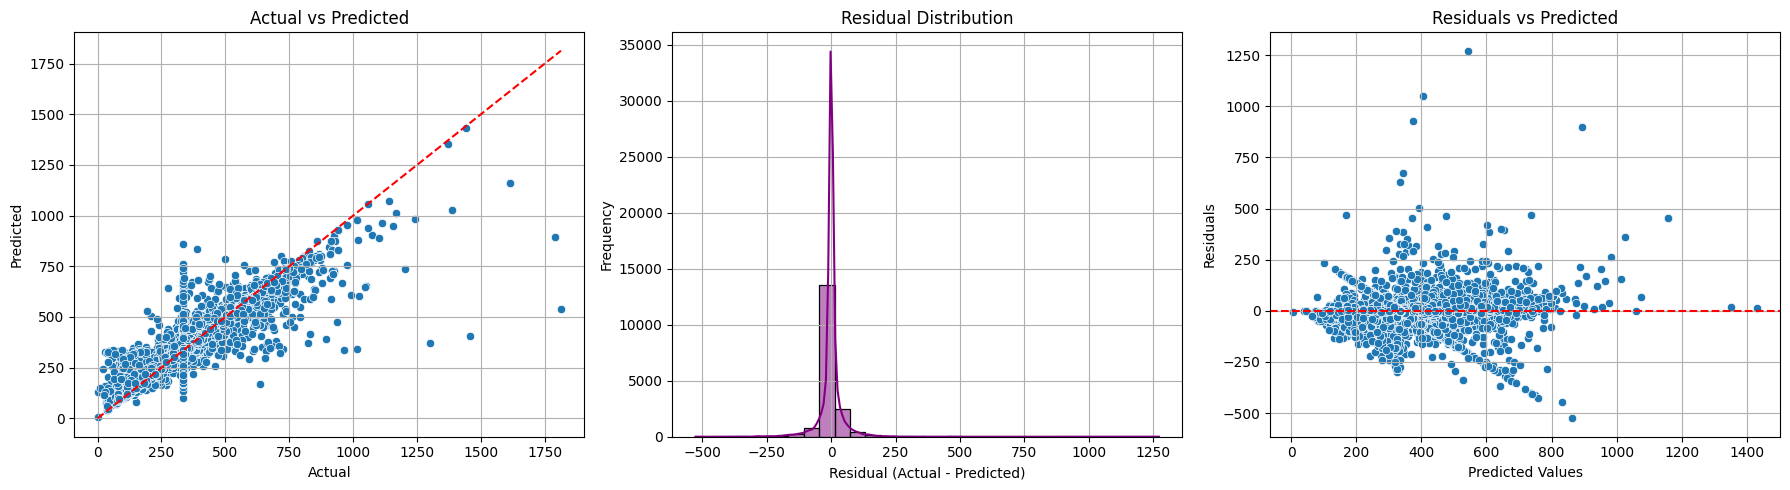

In [ ]:
residuals = y_test - rf_preds

mp.figure(figsize=(18, 5))


mp.subplot(1, 3, 1)
sb.scatterplot(x=y_test, y=rf_preds)
mp.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
mp.xlabel("Actual")
mp.ylabel("Predicted")
mp.title("Actual vs Predicted")
mp.grid(True)


mp.subplot(1, 3, 2)
sb.histplot(residuals, kde=True, bins=30, color='purple')
mp.title("Residual Distribution")
mp.xlabel("Residual (Actual - Predicted)")
mp.ylabel("Frequency")
mp.grid(True)


mp.subplot(1, 3, 3)
sb.scatterplot(x=rf_preds, y=residuals)
mp.axhline(0, color='red', linestyle='--')
mp.title("Residuals vs Predicted")
mp.xlabel("Predicted Values")
mp.ylabel("Residuals")
mp.grid(True)

mp.tight_layout()
mp.show()


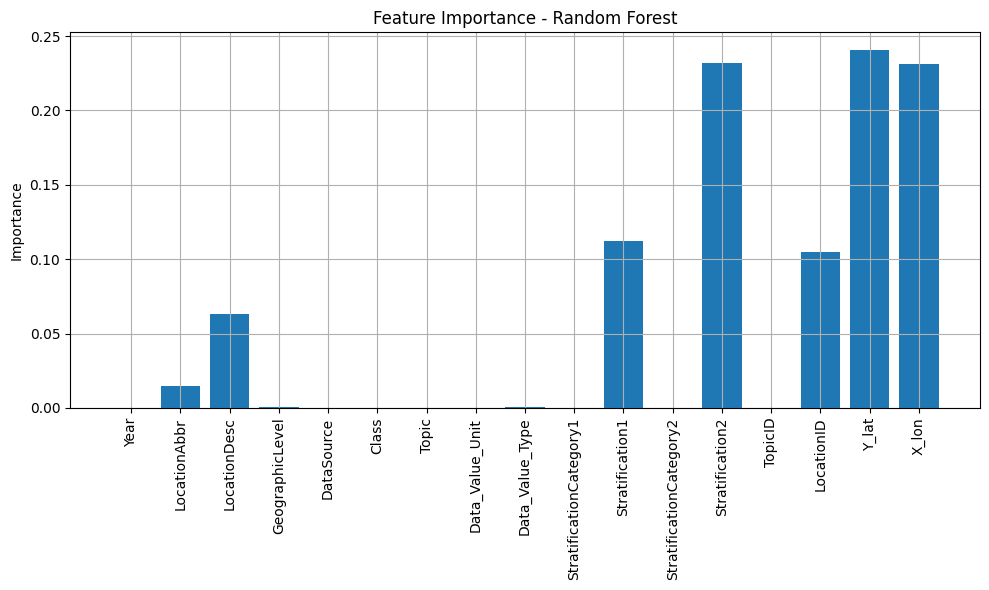

In [ ]:
# Feature Importance Plot
mp.figure(figsize=(10, 6))
importance = rf_model.feature_importances_
features = X.columns  # This doesn't include 'Data_Value' because it's the target
mp.bar(features, importance)
mp.xticks(rotation=90)
mp.title('Feature Importance - Random Forest')
mp.ylabel('Importance')
mp.grid(True)
mp.tight_layout()
mp.show()

### Parameter Tuning For Random Forest

In [ ]:


param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0]
}

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

rf_preds = best_rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("Tuned Random Forest Evaluation:")
print(f"Best Params: {rf_random.best_params_}")
print(f"MSE : {rf_mse:.4f}")
print(f"MAE : {rf_mae:.4f}")
print(f"R²  : {rf_r2:.4f}")


Tuned Random Forest Evaluation:
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 114}
MSE : 2122.7829
MAE : 22.6574
R²  : 0.8338


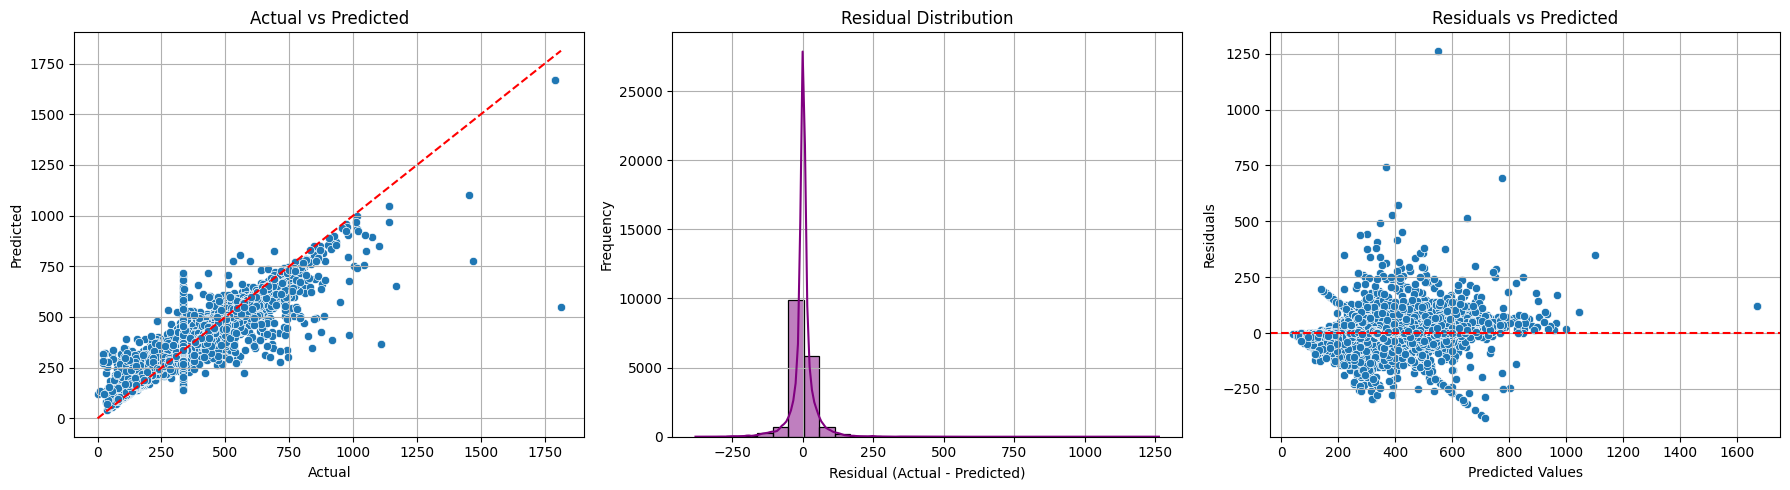

In [ ]:
residuals = y_test - rf_preds

mp.figure(figsize=(18, 5))


mp.subplot(1, 3, 1)
sb.scatterplot(x=y_test, y=rf_preds)
mp.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
mp.xlabel("Actual")
mp.ylabel("Predicted")
mp.title("Actual vs Predicted")
mp.grid(True)


mp.subplot(1, 3, 2)
sb.histplot(residuals, kde=True, bins=30, color='purple')
mp.title("Residual Distribution")
mp.xlabel("Residual (Actual - Predicted)")
mp.ylabel("Frequency")
mp.grid(True)


mp.subplot(1, 3, 3)
sb.scatterplot(x=rf_preds, y=residuals)
mp.axhline(0, color='red', linestyle='--')
mp.title("Residuals vs Predicted")
mp.xlabel("Predicted Values")
mp.ylabel("Residuals")
mp.grid(True)

mp.tight_layout()
mp.show()


#MLP model

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',
                   solver='adam', max_iter=1000, random_state=42)

mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)


print("\nNeural Network (MLP) Evaluation:")
print(f" MSE : {mean_squared_error(y_test, mlp_preds):.4f}")
print(f"MAE : {mean_absolute_error(y_test, mlp_preds):.4f}")
print(f"R²  : {r2_score(y_test, mlp_preds):.4f}")



Neural Network (MLP) Evaluation:
 MSE : 5694.7064
MAE : 48.3182
R²  : 0.5540


### Support Vector Machine

In [ ]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

svm_mse = mean_squared_error(y_test, svm_preds)
svm_mae = mean_absolute_error(y_test, svm_preds)
svm_r2 = r2_score(y_test, svm_preds)

print("\n SVM Regressor Evaluation:")
print(f" MSE : {svm_mse:.4f}")
print(f"MAE : {svm_mae:.4f}")
print(f"R²  : {svm_r2:.4f}")



 SVM Regressor Evaluation:
 MSE : 11489.3774
MAE : 58.1214
R²  : 0.1003


### CNN Transfromable Model

In [ ]:

class CNNTransformerModel(nn.Module):
    def __init__(self, input_dim, cnn_out_dim=64, nhead=4, trans_layers=2, ff_dim=128):
        super(CNNTransformerModel, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(cnn_out_dim)
        )

        encoder_layer = nn.TransformerEncoderLayer(d_model=cnn_out_dim, nhead=nhead, dim_feedforward=ff_dim)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=trans_layers)

        self.regressor = nn.Sequential(
            nn.Linear(cnn_out_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.cnn(x)
        x = x.permute(2, 0, 1)
        x = self.transformer(x)
        x = x.mean(dim=0)
        return self.regressor(x).squeeze()


In [ ]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

model = CNNTransformerModel(input_dim=X.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [ ]:
train_losses = []
val_losses = []
r2_scores = []

for epoch in range(100):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    with torch.no_grad():
        y_preds = model(X_test_tensor).numpy()
        val_loss = mean_squared_error(y_test, y_preds)
        val_losses.append(val_loss)
        r2 = r2_score(y_test, y_preds)
        r2_scores.append(r2)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | R² Score: {r2:.4f}")


Epoch  1 | Train Loss: 18239.9794 | Val Loss: 8982.2417 | R² Score: 0.2966
Epoch  2 | Train Loss: 8926.3285 | Val Loss: 7285.8540 | R² Score: 0.4294
Epoch  3 | Train Loss: 8010.9593 | Val Loss: 6966.6623 | R² Score: 0.4544
Epoch  4 | Train Loss: 7601.7304 | Val Loss: 6506.7913 | R² Score: 0.4904
Epoch  5 | Train Loss: 7376.2983 | Val Loss: 6157.3490 | R² Score: 0.5178
Epoch  6 | Train Loss: 7191.2919 | Val Loss: 6041.0528 | R² Score: 0.5269
Epoch  7 | Train Loss: 7073.7421 | Val Loss: 5871.0490 | R² Score: 0.5402
Epoch  8 | Train Loss: 6923.5750 | Val Loss: 5907.3544 | R² Score: 0.5374
Epoch  9 | Train Loss: 6820.2343 | Val Loss: 5831.1359 | R² Score: 0.5434
Epoch 10 | Train Loss: 6726.2267 | Val Loss: 5815.2274 | R² Score: 0.5446
Epoch 11 | Train Loss: 6651.8893 | Val Loss: 5709.3303 | R² Score: 0.5529
Epoch 12 | Train Loss: 6574.0700 | Val Loss: 5521.6825 | R² Score: 0.5676
Epoch 13 | Train Loss: 6508.0074 | Val Loss: 5645.9136 | R² Score: 0.5579
Epoch 14 | Train Loss: 6443.0440 | Va

In [ ]:

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")


MSE: 4640.16, MAE: 37.81, R²: 0.6366


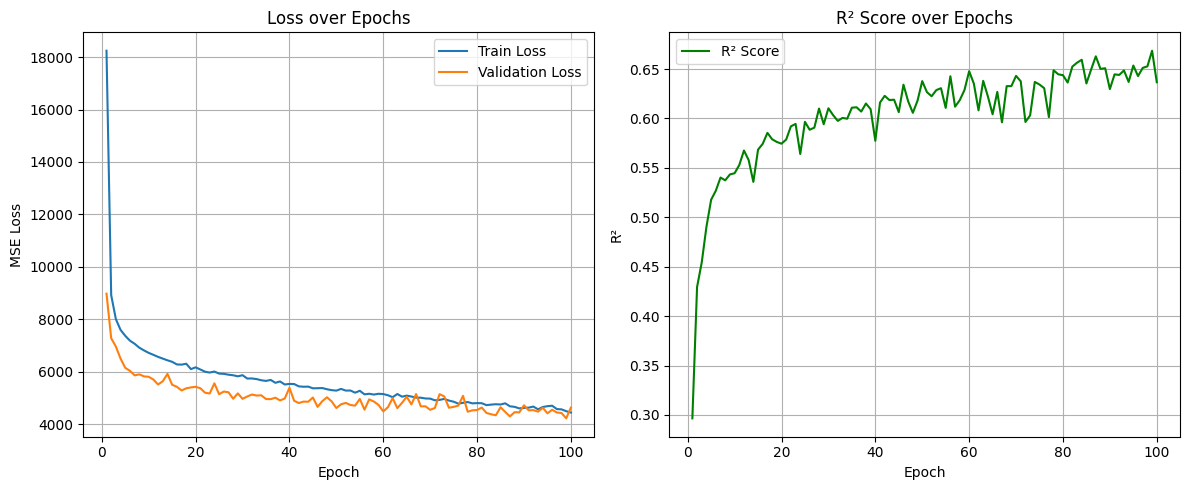

In [ ]:
epochs = range(1, len(train_losses)+1)

mp.figure(figsize=(12, 5))

mp.subplot(1, 2, 1)
mp.plot(epochs, train_losses, label='Train Loss')
mp.plot(epochs, val_losses, label='Validation Loss')
mp.title("Loss over Epochs")
mp.xlabel("Epoch")
mp.ylabel("MSE Loss")
mp.grid(True)
mp.legend()

mp.subplot(1, 2, 2)
mp.plot(epochs, r2_scores, label='R² Score', color='green')
mp.title("R² Score over Epochs")
mp.xlabel("Epoch")
mp.ylabel("R²")
mp.grid(True)
mp.legend()

mp.tight_layout()
mp.show()


### LSTM Model

In [ ]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim,
                            num_layers=num_layers, batch_first=True)
        self.regressor = nn.Sequential(
            nn.Linear(hidden_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        lstm_out, _ = self.lstm(x)
        output = lstm_out[:, -1, :]
        return self.regressor(output).squeeze()


In [ ]:
lstm_model = LSTMRegressor(input_dim=X.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

num_epochs = 200

In [ ]:
lstm_train_losses = []
lstm_val_losses = []
lstm_r2_scores = []

for epoch in range(num_epochs):
    lstm_model.train()
    train_loss = 0
    for xb, yb in train_loader:
        pred = lstm_model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    lstm_train_losses.append(avg_train_loss)


    lstm_model.eval()
    with torch.no_grad():
        val_preds = lstm_model(X_test_tensor).numpy()
        val_loss = mean_squared_error(y_test, val_preds)
        r2 = r2_score(y_test, val_preds)
        lstm_val_losses.append(val_loss)
        lstm_r2_scores.append(r2)

    print(f"[LSTM] Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f} | Val Loss: {val_loss:.4f} | R²: {r2:.4f}")


[LSTM] Epoch 1/200, Train Loss: 22164.0071 | Val Loss: 11932.9304 | R²: 0.0655
[LSTM] Epoch 2/200, Train Loss: 11880.6140 | Val Loss: 11794.5385 | R²: 0.0764
[LSTM] Epoch 3/200, Train Loss: 11777.8326 | Val Loss: 11723.2272 | R²: 0.0819
[LSTM] Epoch 4/200, Train Loss: 11594.1771 | Val Loss: 11241.3868 | R²: 0.1197
[LSTM] Epoch 5/200, Train Loss: 10377.7454 | Val Loss: 9789.7655 | R²: 0.2334


[LSTM] Epoch 6/200, Train Loss: 9433.9843 | Val Loss: 9054.9526 | R²: 0.2909
[LSTM] Epoch 7/200, Train Loss: 8324.3895 | Val Loss: 7492.0911 | R²: 0.4133
[LSTM] Epoch 8/200, Train Loss: 7067.4693 | Val Loss: 6709.7604 | R²: 0.4746
[LSTM] Epoch 9/200, Train Loss: 6632.7061 | Val Loss: 6545.0842 | R²: 0.4874
[LSTM] Epoch 10/200, Train Loss: 6450.6785 | Val Loss: 6310.9461 | R²: 0.5058
[LSTM] Epoch 11/200, Train Loss: 6327.8011 | Val Loss: 6222.8200 | R²: 0.5127
[LSTM] Epoch 12/200, Train Loss: 6236.2097 | Val Loss: 6153.0946 | R²: 0.5181
[LSTM] Epoch 13/200, Train Loss: 6147.2287 | Val Loss: 6150.4031 | R²: 0.5184
[LSTM] Epoch 14/200, Train Loss: 6068.6185 | Val Loss: 6039.1820 | R²: 0.5271
[LSTM] Epoch 15/200, Train Loss: 5999.1336 | Val Loss: 5945.1161 | R²: 0.5344
[LSTM] Epoch 16/200, Train Loss: 5931.9952 | Val Loss: 5926.6096 | R²: 0.5359
[LSTM] Epoch 17/200, Train Loss: 5869.4560 | Val Loss: 5862.0447 | R²: 0.5409
[LSTM] Epoch 18/200, Train Loss: 5821.0921 | Val Loss: 5802.5440 | R

In [ ]:

lstm_model.eval()
with torch.no_grad():
    predictions = lstm_model(X_test_tensor).numpy()

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")


MSE: 4522.67, MAE: 41.40, R²: 0.6458


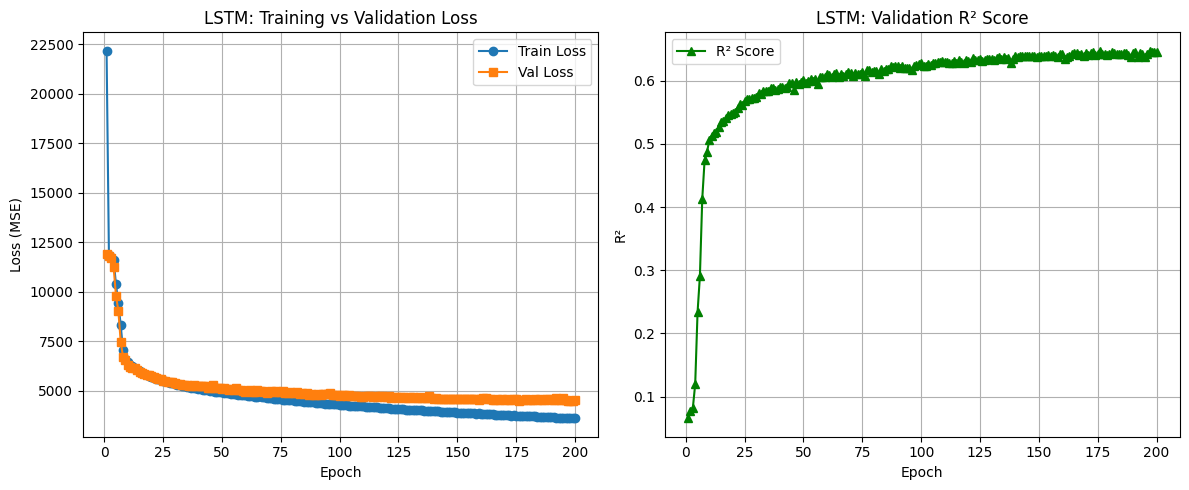

In [ ]:


epochs = range(1, num_epochs + 1)

mp.figure(figsize=(12, 5))


mp.subplot(1, 2, 1)
mp.plot(epochs, lstm_train_losses, label='Train Loss', marker='o')
mp.plot(epochs, lstm_val_losses, label='Val Loss', marker='s')
mp.xlabel("Epoch")
mp.ylabel("Loss (MSE)")
mp.title("LSTM: Training vs Validation Loss")
mp.legend()
mp.grid(True)


mp.subplot(1, 2, 2)
mp.plot(epochs, lstm_r2_scores, label='R² Score', color='green', marker='^')
mp.xlabel("Epoch")
mp.ylabel("R²")
mp.title("LSTM: Validation R² Score")
mp.legend()
mp.grid(True)

mp.tight_layout()
mp.show()
